Arovore implementada conforme o tutorial https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
clf.predict([[2., 2.]])

array([1])

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

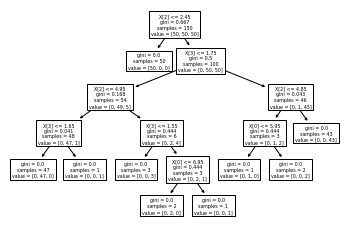

In [ ]:
tree.plot_tree(clf) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

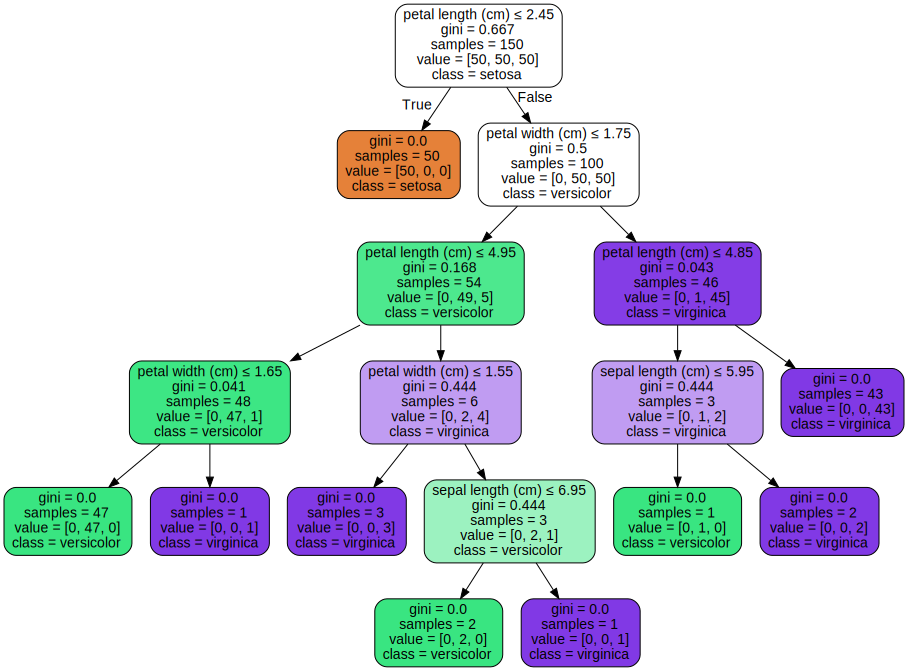

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

Arvore com variacao da Criterion

gini

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.96 de acuracia com desvio padrao de 0.03

K-fold
0.97 de acuracia com desvio padrao de 0.04

Leave One Out
0.96 de acuracia com desvio padrao de 0.03


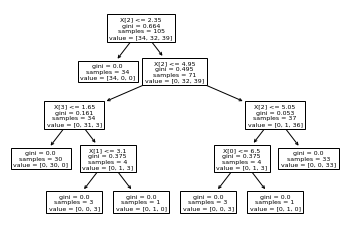

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape, y.shape)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(criterion='gini') 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
# o tamanho do range é igual ao tamanho do batch de test
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

entropy

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.96 de acuracia com desvio padrao de 0.03

K-fold
0.95 de acuracia com desvio padrao de 0.03

Leave One Out
0.95 de acuracia com desvio padrao de 0.03


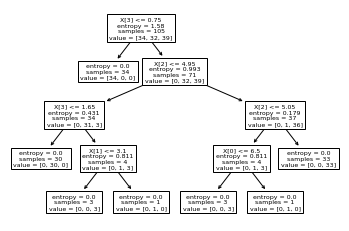

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(criterion='entropy') 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

Arvore com variação do Splitter

best

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.96 de acuracia com desvio padrao de 0.03

K-fold
0.96 de acuracia com desvio padrao de 0.03

Leave One Out
0.96 de acuracia com desvio padrao de 0.03


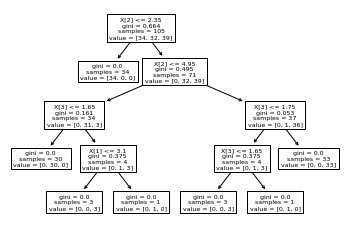

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(splitter = 'best') 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(splitter = 'best')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

random

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 1 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
95.56%


holdout cross-validation
0.96 de acuracia com desvio padrao de 0.01

K-fold
0.95 de acuracia com desvio padrao de 0.02

Leave One Out
0.94 de acuracia com desvio padrao de 0.05


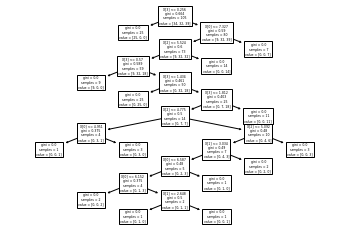

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(splitter = 'random') 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(splitter = 'random')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

Arvore com variação de max_depth

none

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.96 de acuracia com desvio padrao de 0.03

K-fold
0.97 de acuracia com desvio padrao de 0.04

Leave One Out
0.97 de acuracia com desvio padrao de 0.04


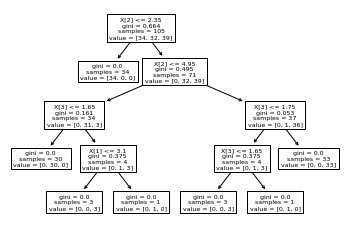

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut


X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(max_depth = None) 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(max_depth = None)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

2

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
91.11%


holdout cross-validation
0.93 de acuracia com desvio padrao de 0.05

K-fold
0.93 de acuracia com desvio padrao de 0.05

Leave One Out
0.93 de acuracia com desvio padrao de 0.05


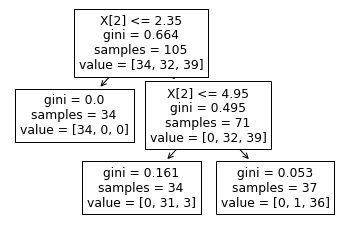

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(max_depth = 2) 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

4

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.95 de acuracia com desvio padrao de 0.03

K-fold
0.96 de acuracia com desvio padrao de 0.03

Leave One Out
0.95 de acuracia com desvio padrao de 0.03


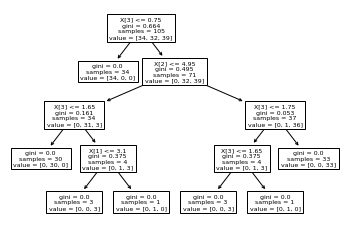

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(max_depth = 4) 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('\n')
print('holdout cross-validation')
#print(clf.score(X_test, y_test))


#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

Arvore com variação de min_samples_split

2

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%


holdout cross-validation
0.97 de acuracia com desvio padrao de 0.04

K-fold
0.95 de acuracia com desvio padrao de 0.03

Leave One Out
0.97 de acuracia com desvio padrao de 0.04


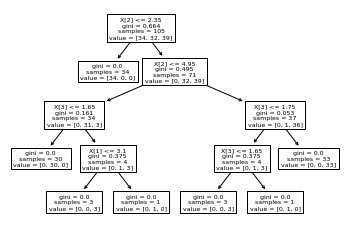

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(min_samples_split = 2) 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(min_samples_split = 2)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 
print('\n')

#clf = svm.SVC(kernel='linear', C=1, random_state=42)
print('holdout cross-validation')
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

10

Predição: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


groundtruth
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Acc
97.78%

holdout cross-validation
0.97 de acuracia com desvio padrao de 0.02

K-fold
0.97 de acuracia com desvio padrao de 0.02

Leave One Out
0.97 de acuracia com desvio padrao de 0.02


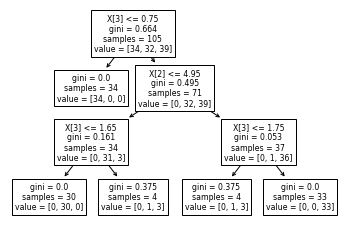

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

X = [[0, 0], [1, 1]] 
Y = [0, 1] 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, Y) 
clf.predict([[2., 2.]]) # classifica o novo exemplo 

X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y)
clf = tree.DecisionTreeClassifier(min_samples_split = 10) 
clf = clf.fit(X, y) 
#tree.plot_tree(clf) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_test.shape
#X_train.shape
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
resposta = clf.predict(X_test)
print('Predição: ')
print(resposta)
print('\n')
print('groundtruth')
print(y_test)

cont = 0
for i in range (45):
  if clf.predict(X_test)[i] == y_test[i]:
    cont = cont + 1
#print(cont) 
print('\n')
print('Acc')
print("{:.2%}".format((cont/45))) 

print('\nholdout cross-validation')
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))

print('\nK-fold')
X_train, X_test, y_train, y_test =  X[train], X[test], y[train], y[test]
kf = KFold(n_splits=10)
for train, test in kf.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
    #print("%s\n \n%s\n" % (train, test))

print('\nLeave One Out')

loo = LeaveOneOut()
for train, test in loo.split(X):
  #clf = svm.SVC(kernel='linear', C=1)
  scores = cross_val_score(clf, X, y)
print("%0.2f de acuracia com desvio padrao de %0.2f" % (scores.mean(), scores.std()))
     #print("%s %s" % (train, test))

Existe diferença entre as árvores? 

R = Sim, existe diferença, pois a medida que vamos modificando os parametros(pesos na arvore de decisão), isso vai alterando a complexidade da arvore, tornando-a com mais ou menos camadas e com pesos diferentes nas folhas, o que interfere diretamente no resultado (acurácia) da arvore de decisão, onde podemos ver que arvores com custo menor(menor complexidade e numero de camadas) podem obter a mesma ou melhor acurácia que arvores com maior grau de complexidade, um otimo exemplo é a variação do splitter


In [ ]:
import plotly.graph_objects as go


open_data = [0.03, 0.03, 0.03, 0.01, 0.03, 0.05, 0.03, 0.03, 0.02]
high_data = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

low_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
close_data = [0.04, 0.03, 0.03, 0.05, 0.04, 0.05, 0.03, 0.04, 0.02]
dates = ['A1','A2','A3','A4','A5','A6','A7','A8','A9']

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])

fig.show()